<a href="https://colab.research.google.com/github/IoannisDem/SimpleDL_models/blob/main/imageNet_googlenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls gdrive/MyDrive/'Colab Notebooks'/imageNet

imageNet.ipynb	imagenette2.tgz


In [3]:
#unzip tgz file
!tar -xvf  'gdrive/MyDrive/Colab Notebooks/imageNet/imagenette2.tgz'

Streaming output truncated to the last 5000 lines.
imagenette2/train/n03888257/n03888257_16077.JPEG
imagenette2/train/n03888257/n03888257_23339.JPEG
imagenette2/train/n03888257/n03888257_44204.JPEG
imagenette2/train/n03888257/n03888257_61633.JPEG
imagenette2/train/n03888257/n03888257_15067.JPEG
imagenette2/train/n03888257/n03888257_75365.JPEG
imagenette2/train/n03888257/n03888257_63966.JPEG
imagenette2/train/n03888257/n03888257_3927.JPEG
imagenette2/train/n03888257/n03888257_20684.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2/train/n03888257/n03888257_14016.JPEG
imagenette2/train/n03888257/n03888257_37776.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2/train/n03888257/n03888257_17513.JPEG
imagenette2/train/n03888257/n03888257_17143.JPEG
imagenette2/train/n03888257/n03888257_6738.JPEG
imagenette2/train/n03888257/n03888257_4355.JPEG
imagenette2/train/n03888257/ILSVRC2012_val_00030583.JPEG
imagenette2/train/n03888257/n03888257_18127.JP

In [20]:
#import libraries
import pandas as pd
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow # for image display
import sklearn
from sklearn.utils import shuffle
from PIL import Image
from torchvision import transforms

In [5]:
#open csv to get labels and paths
df = pd.read_csv('imagenette2/noisy_imagenette.csv')
df.head()

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False
3,train/n02979186/n02979186_21736.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,n02979186,n02979186,n02979186,n02979186,n03394916,False


In [6]:
# Number of classes in the dataset
num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for
num_epochs = 15

# Flag for feature extracting. When False, we finetune the whole model,
# when True we only update the reshaped layer params
feature_extract = True

In [7]:
#use labels of 0 noise
x_train_paths = np.array(df['path'])
y_train = np.array(df['noisy_labels_0'])

In [8]:
#adding path
x_train_paths = 'imagenette2' + '/' + x_train_paths

In [9]:
#shuffle training data
x_train_paths, y_train = shuffle(x_train_paths, y_train, random_state = 0)

In [10]:
#preprocess images
#224x224 RGB images
images = []
x_train = [] #using 224x224 images
count = 0
for path in x_train_paths:
  input_image = Image.open(path)
  input_image = input_image.convert('RGB')
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  images.append(input_tensor) #images RGB
  input_batch = input_tensor.unsqueeze(0)
  x_train.append(input_batch)

In [11]:
#initiatinf model 
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained = True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [15]:
if torch.cuda.is_available():
    input_batch = x_train[0].to('cuda')
    model.to('cuda')
    print(1)

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


tensor([ 1.1914e-01,  1.9152e-01, -5.6500e-01, -2.6242e-01,  6.4286e-02,
         7.3923e-01, -1.1256e+00, -5.8159e-01, -7.9756e-01,  2.7755e-01,
        -1.1988e+00, -6.0992e-01, -1.1933e+00, -3.6973e-01, -1.3276e+00,
        -1.3251e+00,  4.9837e-02,  3.7938e-01, -4.1405e-01,  5.3972e-01,
        -8.2440e-01,  5.7166e-02,  1.8932e-01,  9.2626e-05,  3.6986e-01,
         4.7198e-01, -4.1530e-01,  1.8894e-01,  8.2253e-01, -1.3962e+00,
        -2.1435e-01,  1.4313e-01, -1.9376e-01,  2.0698e-01,  3.5245e-01,
         4.9115e-01, -3.6294e-01, -1.4857e-01,  4.4788e-01,  9.7312e-02,
        -9.8778e-01, -8.6069e-01,  6.7227e-01,  4.3655e-01, -5.2156e-02,
         7.0241e-01, -7.3946e-01,  4.5637e-01,  8.5793e-01, -7.5581e-01,
        -1.8774e-01,  1.7221e+00, -3.1192e-01,  4.6646e-01,  3.9809e-01,
        -2.8582e-01,  1.2445e-01, -1.0266e+00, -8.1746e-01, -7.7513e-01,
         1.8062e-01, -3.8179e-01, -5.8348e-01, -7.2519e-02,  2.0749e-01,
         4.9521e-01,  7.6084e-01,  3.6489e-01,  5.2

In [16]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-06-21 09:40:29--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-06-21 09:40:30 (96.4 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [17]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

garbage truck 0.4679993689060211
tow truck 0.22948718070983887
snowplow 0.051553770899772644
crane 0.04937233030796051
jeep 0.01681937836110592


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


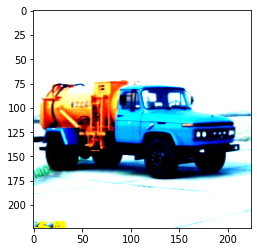

In [23]:
print(images[0].shape)
plt.imshow(images[0].permute(1, 2, 0)  )

In [24]:
#use to see model
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
       BasicConv2d-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
       BasicConv2d-7           [-1, 64, 56, 56]               0
            Conv2d-8          [-1, 192, 56, 56]         110,592
       BatchNorm2d-9          [-1, 192, 56, 56]             384
      BasicConv2d-10          [-1, 192, 56, 56]               0
        MaxPool2d-11          [-1, 192, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          12,288
      BatchNorm2d-13           [-1, 64, 28, 28]             128
      BasicConv2d-14           [-1, 64,

In [28]:
#save model
path = F"/content/gdrive/My Drive/Colab Notebooks/models/imagenet_googlenet/imagenet_googlenet"
torch.save(model.state_dict(), path)

In [29]:
#load model
model.load_state_dict(torch.load(path))
model.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track